<a href="https://colab.research.google.com/github/Omars2003/Analisis_de_datos/blob/main/Analisis_Mercado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANALISIS DE ACCIONES DEL MERCADO
Omar martínez garcía


🎌El siguiente código realiza un análisis de acciones del mercado utilizando las bibliotecas pandas, Keras, Matlab y yfinance:

🎌Se importan las bibliotecas necesarias, como pandas para el manejo de datos, Keras para la construcción de modelos de redes neuronales, Matlab para realizar análisis de series de tiempo y yfinance para obtener datos históricos de acciones.

🎌Utilizando la biblioteca yfinance, se descargan los datos históricos de una acción específica.

🎌Se preparan los datos descargados utilizando pandas, creando un DataFrame que incluye el precio de cierre y calculando los rendimientos porcentuales diarios.

🎌Se realiza un análisis de series de tiempo utilizando Matlab. Los rendimientos calculados anteriormente se pasan a Matlab para realizar el análisis utilizando algún método o algoritmo específico.

🎌Los resultados del análisis de Matlab se obtienen y almacenan en una variable.

🎌Se construye un modelo de red neuronal utilizando la biblioteca Keras. El modelo puede tener una o más capas ocultas, y se especifican las funciones de activación y el número de neuronas en cada capa.

🎌Se compila el modelo especificando el optimizador y la función de pérdida que se utilizará durante el entrenamiento.

🎌El modelo se entrena utilizando los datos de rendimientos obtenidos previamente, donde se divide el conjunto de datos en entradas y salidas para el entrenamiento de la red neuronal.

🎌Se realizan predicciones utilizando el modelo entrenado y se almacenan en una variable.

🎌Los resultados del análisis realizado en Matlab y las predicciones generadas por el modelo de red neuronal se imprimen en la salida.

In [ ]:
import pandas as pd  # Import the pandas library for data manipulation and analysis
import numpy as np  # Import the numpy library for mathematical functions and array operations
from datetime import datetime  # Import the datetime module from the datetime library for working with dates and times
import matplotlib.pyplot as plt  # Import the pyplot module from the matplotlib library for data visualization
import seaborn as sns  # Import the seaborn library for enhanced data visualization
sns.set_style('whitegrid')  # Set the default style for seaborn plots to have a white grid in the background
plt.style.use("fivethirtyeight")  # Set the default plot style to "fivethirtyeight" for a specific visual style
#%matplotlib inline  # Enable inline display of plots in Jupyter Notebook or JupyterLab


In [ ]:
from pandas_datareader.data import DataReader  # Import the DataReader class from the pandas_datareader library
import yfinance as yf  # Import the yfinance library for fetching financial data from Yahoo Finance
from pandas_datareader import data as pdr  # Import the data module from pandas_datareader library

yf.pdr_override()  # Override the pandas_datareader's default behavior to use yfinance as the data source


In [ ]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
end = datetime.now()  # Get the current date and time
start = datetime(end.year - 1, end.month, end.day)  # Calculate the start date as one year before the current date


🥇 The first section downloads stock data for each stock in the tech_list. The yf.download() function from the yfinance library is used to fetch the stock data for the specified time period.
🥇 The second section creates a list (company_list) that contains the stock dataframes (AAPL, GOOG, MSFT, AMZN) and another list (company_name) that contains the corresponding company names.
🥇 the third section uses a loop to assign the company names as a new column (company_name) in each stock dataframe.
🥇The fourth section concatenates all the stock dataframes in company_list into a single dataframe (df) using the pd.concat() function from the pandas library

In [ ]:
# Download stock data for each stock in the tech_list
for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

# Create a list of stock dataframes and assign company names
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

# Assign company names as a new column in each stock dataframe
for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

# Concatenate all stock dataframes into a single dataframe
df = pd.concat(company_list, axis=0)

# Display the last 10 rows of the concatenated dataframe
df.tail(10)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-05-10,108.099998,110.669998,108.050003,110.190002,110.190002,78627600,AMAZON
2023-05-11,111.029999,113.279999,110.489998,112.180000,112.180000,74924800,AMAZON
2023-05-12,112.160004,112.639999,109.320000,110.260002,110.260002,49810100,AMAZON
2023-05-15,111.150002,112.290001,109.250000,111.199997,111.199997,53011100,AMAZON
2023-05-16,111.050003,114.790001,111.050003,113.400002,113.400002,71472900,AMAZON
2023-05-17,114.889999,115.830002,114.220001,115.500000,115.500000,65655200,AMAZON
2023-05-18,116.690002,118.599998,116.339996,118.150002,118.150002,73174100,AMAZON
2023-05-19,118.160004,118.309998,115.699997,116.250000,116.250000,54990200,AMAZON
2023-05-22,116.769997,116.769997,114.250000,115.010002,115.010002,70613200,AMAZON


In [ ]:
AAPL.describe()

In [ ]:
AAPL.info()

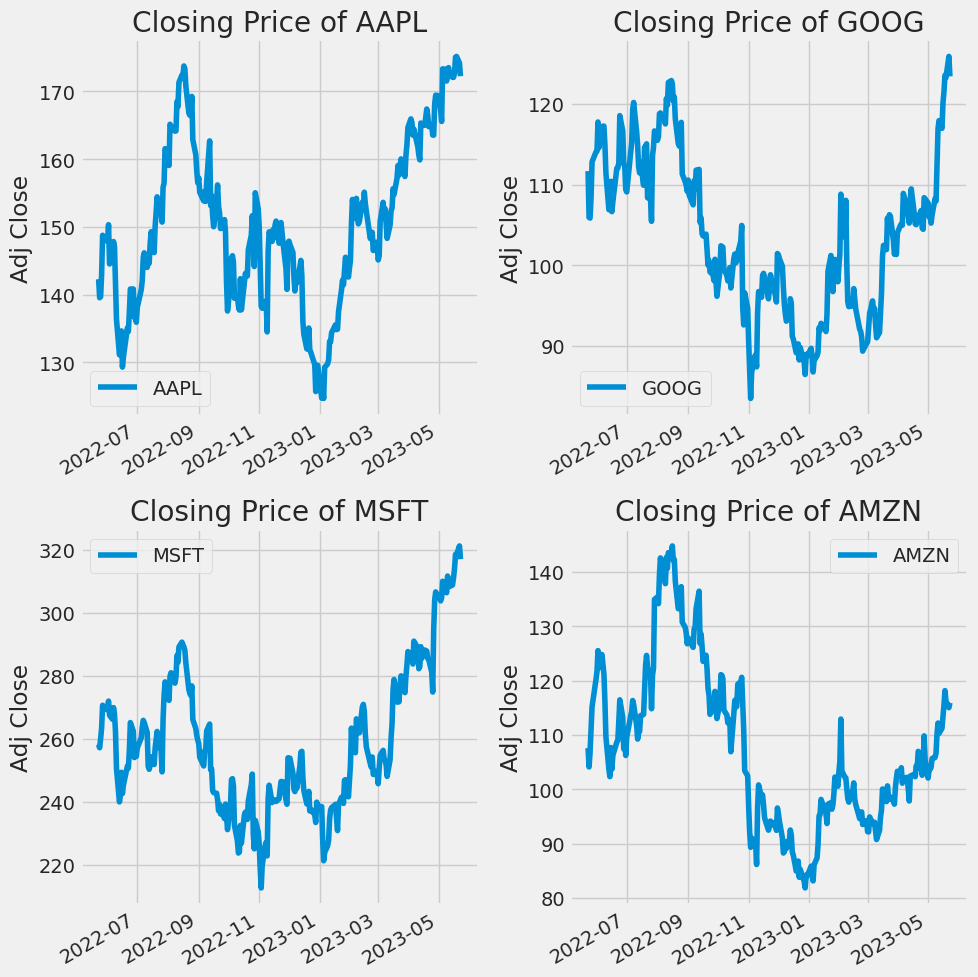

In [ ]:
plt.figure(figsize=(10, 10))  # Create a new figure with a specified size of 10x10 inches
plt.subplots_adjust(top=1.25, bottom=1.2)  # Adjust the spacing between subplots

# Iterate over the company_list and plot the adjusted close prices for each company
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)  # Create a subplot grid of 2 rows and 2 columns, select the i-th subplot
    company['Adj Close'].plot()  # Plot the 'Adj Close' column from the company's dataframe
    plt.ylabel('Adj Close')  # Set the y-axis label as 'Adj Close'
    plt.xlabel(None)  # Remove the x-axis label
    plt.title(f"Closing Price of {tech_list[i - 1]}")  # Set the title for the subplot
    plt.grid(True)  # Enable the gridlines in the plot
    plt.legend([tech_list[i - 1]])  # Add a legend with the tech_list name for the corresponding company

plt.tight_layout()  # Automatically adjust subplot parameters to fit the figure area


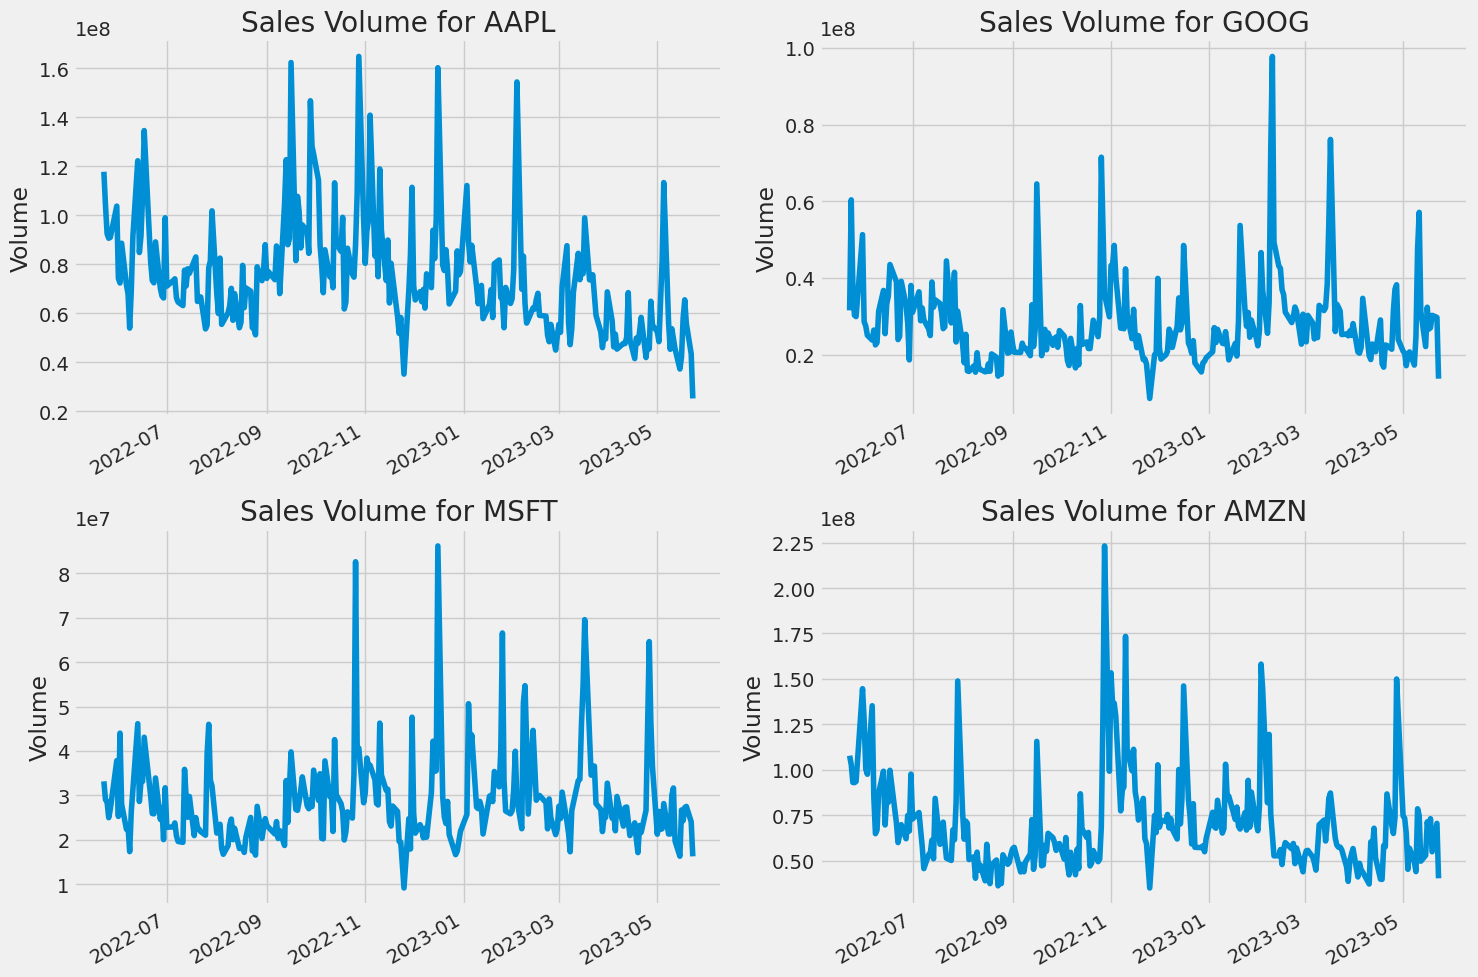

In [ ]:
plt.figure(figsize=(15, 10))  # Create a new figure with a specified size of 15x10 inches
plt.subplots_adjust(top=1.25, bottom=1.2)  # Adjust the spacing between subplots

# Iterate over the company_list and plot the volume of stock traded each day
for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)  # Create a subplot grid of 2 rows and 2 columns, select the i-th subplot
    company['Volume'].plot()  # Plot the 'Volume' column from the company's dataframe
    plt.ylabel('Volume')  # Set the y-axis label as 'Volume'
    plt.xlabel(None)  # Remove the x-axis label
    plt.title(f"Sales Volume for {tech_list[i - 1]}")  # Set the title for the subplot
    plt.grid(True)  # Enable the gridlines in the plot

plt.tight_layout()  # Automatically adjust subplot parameters to fit the figure area


In [ ]:
ma_day = [20, 40, 60]  # Define a list of moving average periods

for ma in ma_day:  # Iterate over each moving average period
    for company in company_list:  # Iterate over each company in the company_list
        column_name = f"MA for {ma} days"  # Define the column name for the moving average
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        # Calculate the moving average for the 'Adj Close' column using the specified period
        # and assign it to a new column in the company's dataframe


⭐ma_day list contains the periods (number of days) for which moving averages will be calculated.

⭐The outer for loop iterates over each moving average period (ma) in ma_day.

⭐The inner for loop iterates over each company (company) in the company_list.

🔥column_name is defined as a string that represents the column name for the moving average with the current period.

🔥company[column_name] = company['Adj Close'].rolling(ma).mean() calculates the moving average for the 'Adj Close' column of the company's dataframe using the specified period (ma) and assigns it to a new column with the defined column_name.

🔥By the end of this code, each company's dataframe in company_list will have additional columns representing the moving averages for the specified periods.

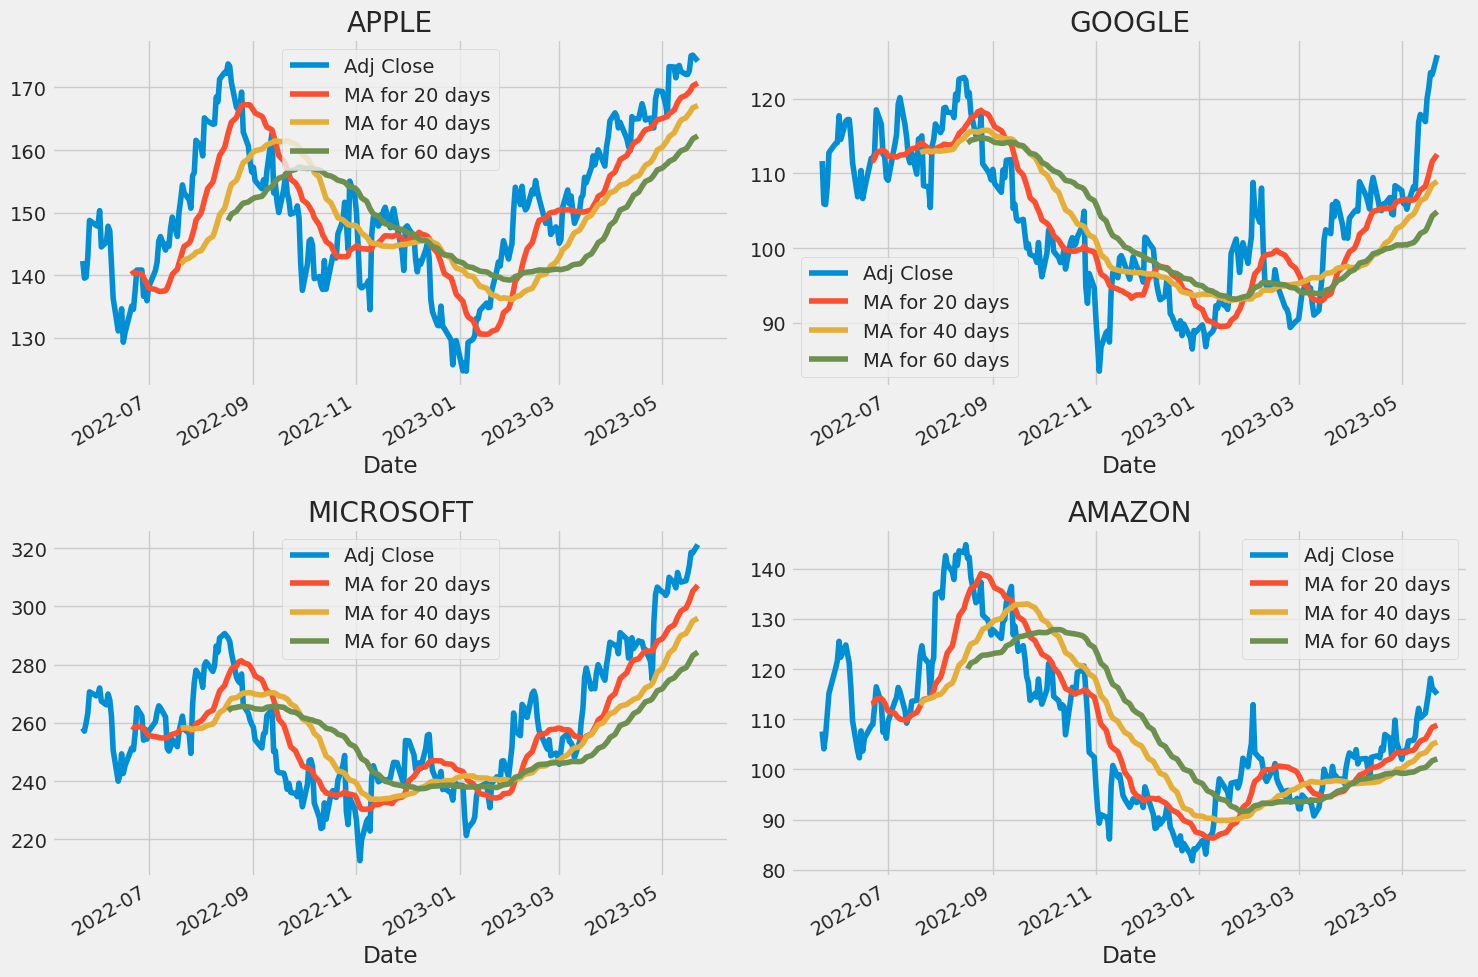

In [ ]:
# Create subplots and set the figure size
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

# Plot the adjusted close prices and moving averages for each company
AAPL[['Adj Close', 'MA for 20 days', 'MA for 40 days', 'MA for 60 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 20 days', 'MA for 40 days', 'MA for 60 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 20 days', 'MA for 40 days', 'MA for 60 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 20 days', 'MA for 40 days', 'MA for 60 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

# Adjust the spacing between subplots
fig.tight_layout()


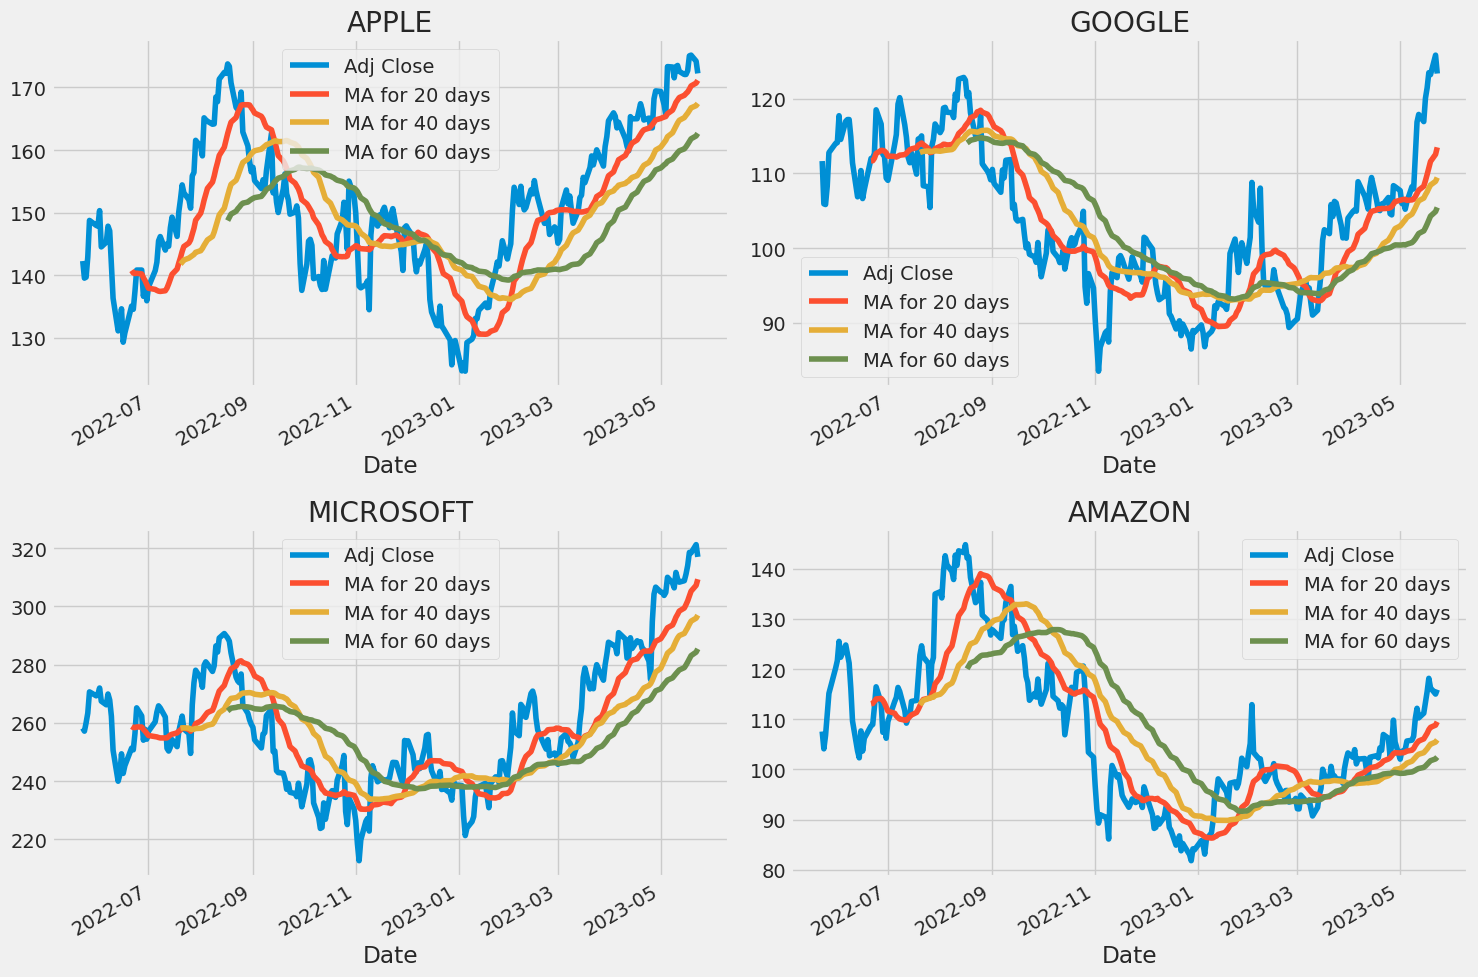

In [ ]:
## Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

## Define the stock data objects and company names
companies = [AAPL, GOOG, MSFT, AMZN]
company_names = ['APPLE', 'GOOGLE', 'MICROSOFT', 'AMAZON']

## Iterate over companies and company names
for i, (company, name) in enumerate(zip(companies, company_names)):
    ## Calculate the row and column numbers for the current subplot
    row = i // 2
    col = i % 2
    
    ## Access the appropriate Axes object from the array of subplots
    ax = axes[row, col]
    
    ## Plot the selected columns from the company DataFrame on the current Axes
    company[['Adj Close', 'MA for 20 days', 'MA for 40 days', 'MA for 60 days']].plot(ax=ax)
    
    ## Set the title of the subplot to the company name
    ax.set_title(name)

## Adjust the positions and spacing of subplots
fig.tight_layout()

Daily return next

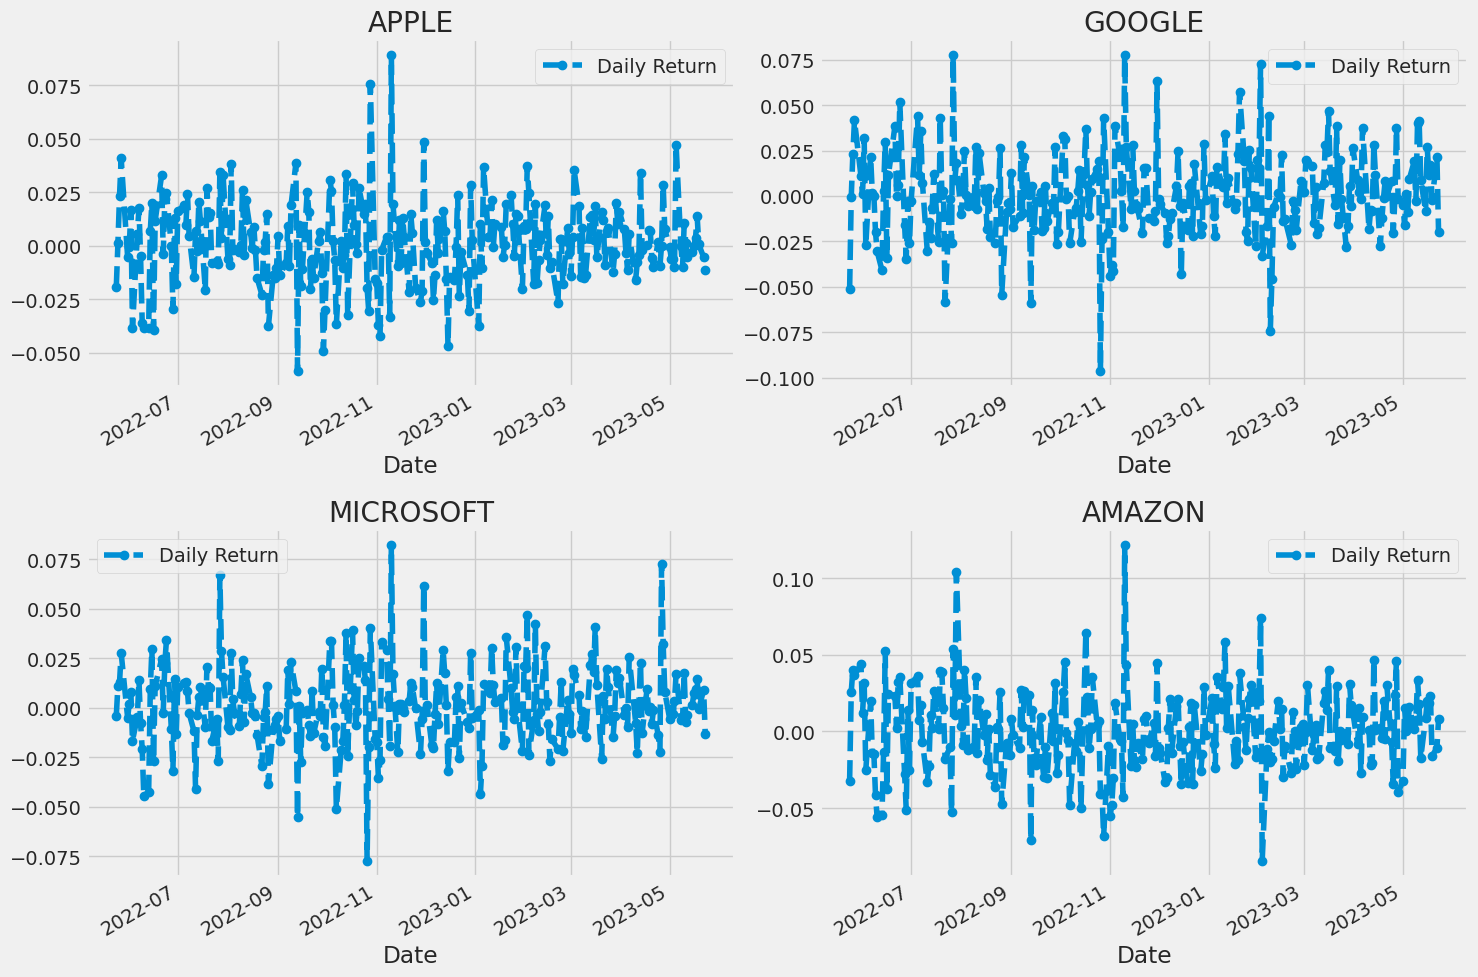

In [ ]:
## Calculate the daily return percentage for each company
for company in company_list:
    ## Calculate the daily return as the percentage change in the adjusted close price
    company['Daily Return'] = company['Adj Close'].pct_change()

## Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=2)
## Set the size of the figure
fig.set_figheight(10)
fig.set_figwidth(15)

## Plot the daily return percentage for each company
AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

## Adjust the positions and spacing of subplots
fig.tight_layout()

⚓ Iterate over each company in the company_list.

⚓Calculate the daily return by taking the percentage change in the adjusted close price and assign it to the 'Daily Return' column of the company's DataFrame.

⚓Create a figure object with 2 rows and 2 columns of subplots using subplots().
Store the axes of the subplots in the axes variable.

⚓Set the height and width of the figure using set_figheight() and set_figwidth().
⚓Plot the daily return percentage for each company on the corresponding subplot using the plot() function.

⚓Specify the Axes object for each subplot using the ax argument.
Customize the plot appearance with parameters like legend, linestyle, and marker.

⚓Set the title of each subplot to the company name using set_title().

🤐 function to iterate over both the companies and company_names lists simultaneously. The enumerate function is used to keep track of the current index in the loop. The row and column indices for each subplot are calculated based on the index using integer division (//) and modulus (%).

With this approach, you can easily add more companies to the companies and company_names lists, and the code will automatically create the appropriate number of subplots and plot the data for each company.

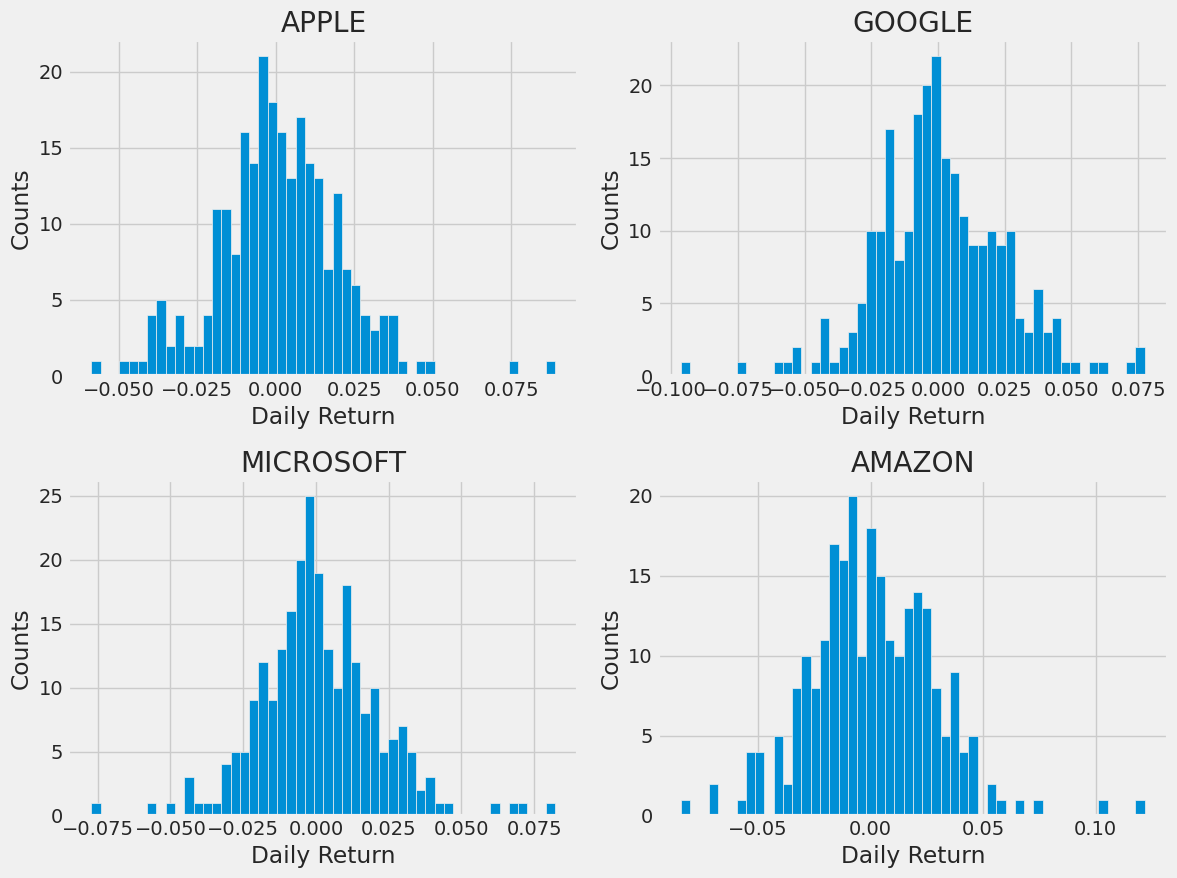

In [ ]:
plt.figure(figsize=(12, 9))

## Iterate over each company and create subplots
for i, company in enumerate(company_list, 1):
    ## Create a subplot
    plt.subplot(2, 2, i)
    
    ## Plot the histogram of daily returns for the current company
    company['Daily Return'].hist(bins=50)
    
    ## Set the x-axis label
    plt.xlabel('Daily Return')
    
    ## Set the y-axis label
    plt.ylabel('Counts')
    
    ## Set the title of the subplot to the company name
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

correlation ⚛  📊

 📊Correlation is a statistical measure that quantifies the strength and direction of the relationship between two variables. It helps us understand how changes in one variable are associated with changes in another variable.

 📊The correlation coefficient, often denoted by the symbol "r," ranges between -1 and +1. The sign of the correlation coefficient (+/-) indicates the direction of the relationship, while the magnitude (absolute value) represents the strength of the relationship. Here's what the correlation coefficient values indicate:

 📊A positive correlation (r > 0) indicates a direct or positive relationship. As one variable increases, the other variable also tends to increase.

 📊A negative correlation (r < 0) indicates an inverse or negative relationship. As one variable increases, the other variable tends to decrease.
 
 📊A correlation coefficient of 0 (r = 0) indicates no linear relationship between the variables.

 📊It's important to note that correlation measures the linear relationship between variables. It does not imply causation, meaning that a high correlation does not necessarily imply that one variable causes changes in the other. Correlation only measures the degree of association between the variables.

In [ ]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()



[*********************100%***********************]  4 of 4 completed


,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-05-23,NaN,NaN,NaN,NaN
2022-05-24,-0.019216,-0.032141,-0.051407,-0.003952
2022-05-25,0.001140,0.025696,-0.000817,0.011170
2022-05-26,0.023200,0.040295,0.023210,0.012875
2022-05-27,0.040757,0.036632,0.041581,0.027604


🏸  This code uses the pdr.get_data_yahoo() function from the pandas-datareader library to fetch historical stock data from Yahoo Finance.

🏸  The tech_list variable contains a list of stock symbols or tickers for technology companies.

🏸   start and end variables specify the start and end dates for the data retrieval.

🏸The ['Adj Close'] indexing retrieves only the 'Adj Close' column from the fetched data.



🏸The .pct_change() method is called on the closing_df DataFrame.
This method calculates the percentage change between consecutive rows, representing the daily returns for each stock.

🏸The resulting DataFrame is assigned to the variable tech_rets.

🏸The .head() method is used to display the first few rows of the tech_rets DataFrame, showing the calculated daily returns.

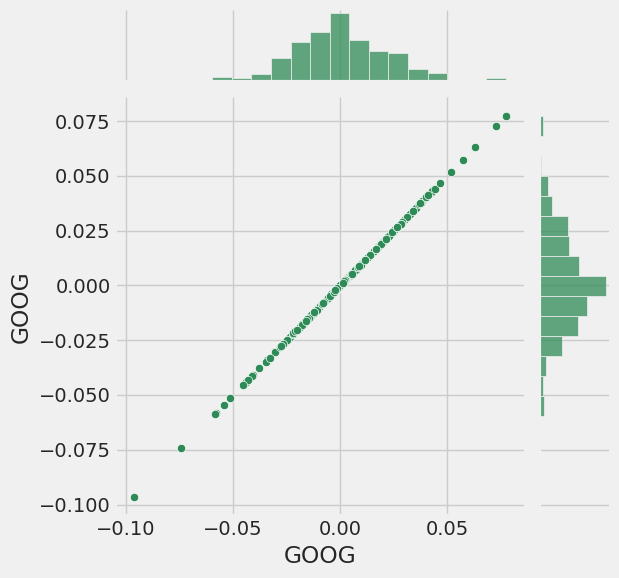

In [ ]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

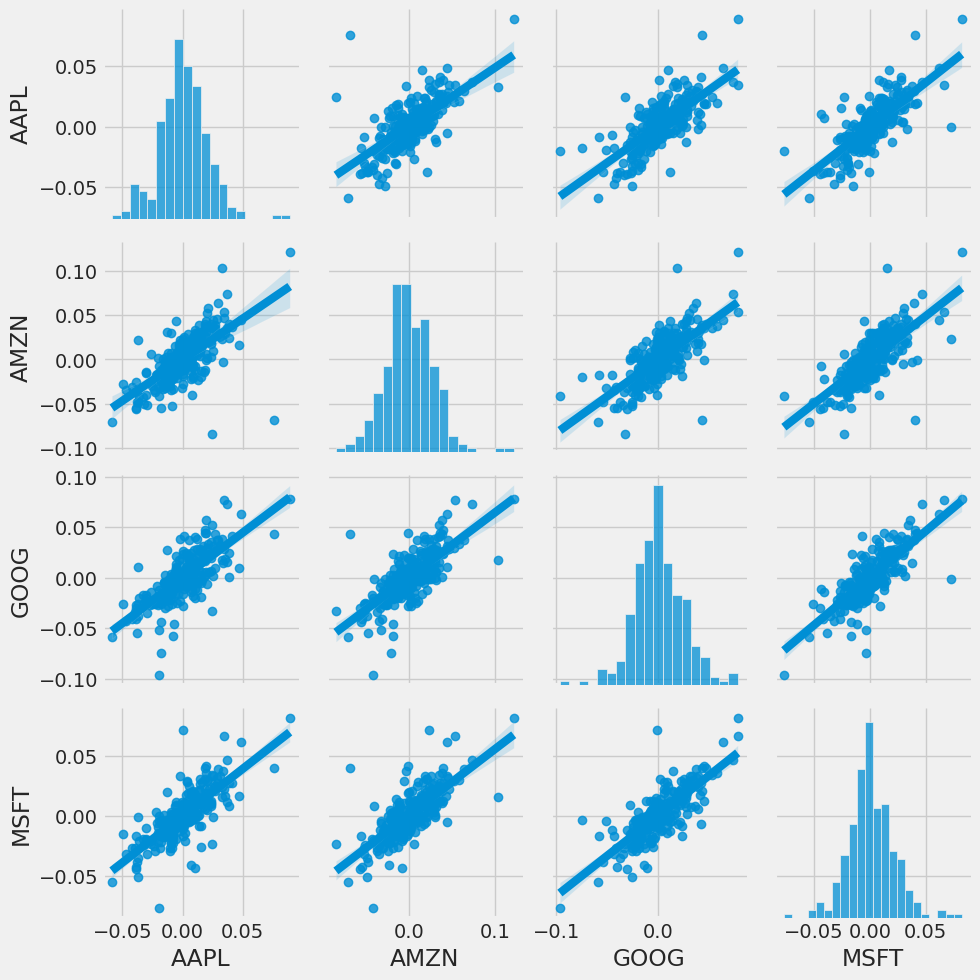

In [ ]:
sns.pairplot(tech_rets, kind='reg')
#The pairplot() function in Seaborn is used to 
#visualize pairwise relationships between multiple variables in a dataset.

#By default, the pairplot() function plots scatter plots for each pairwise combination of variables in the DataFrame.


#The kind parameter is set to 'reg', indicating that a linear regression line will be fit to the scatter plots.
#The kind='reg' option adds a regression line to each scatter plot, providing an estimate of the linear relationship between the variables.

Correlation Plot ⚫

Correlation is a statistical measure that describes the degree and direction of the relationship between two or more variables. It quantifies how changes in one variable correspond to changes in another variable. Correlation provides insights into the association between variables but does not imply causation.

The most common measure of correlation is Pearson's correlation coefficient, denoted as "r." It ranges from -1 to +1 and indicates the strength and direction of the linear relationship between variables. The interpretation of the correlation coefficient is as follows:

A correlation coefficient of +1 signifies a perfect positive correlation, where the variables move in the same direction.
A correlation coefficient of -1 signifies a perfect negative correlation, where the variables move in opposite directions.
A correlation coefficient close to 0 indicates little to no linear relationship between the variables.
It's important to note that correlation only measures the linear relationship between variables. Non-linear relationships may not be captured by Pearson's correlation coefficient. In such cases, other correlation measures like Spearman's rank correlation coefficient or Kendall's tau can be used.

Correlation analysis is widely used in various fields, including statistics, economics, social sciences, finance, and data science. It helps researchers and analysts understand connections between variables, identify patterns, make predictions, and guide decision-making. However, it's essential to exercise caution and consider other factors before inferring causation based solely on correlation.








Text(0.5, 1.0, 'Correlation of stock closing price')

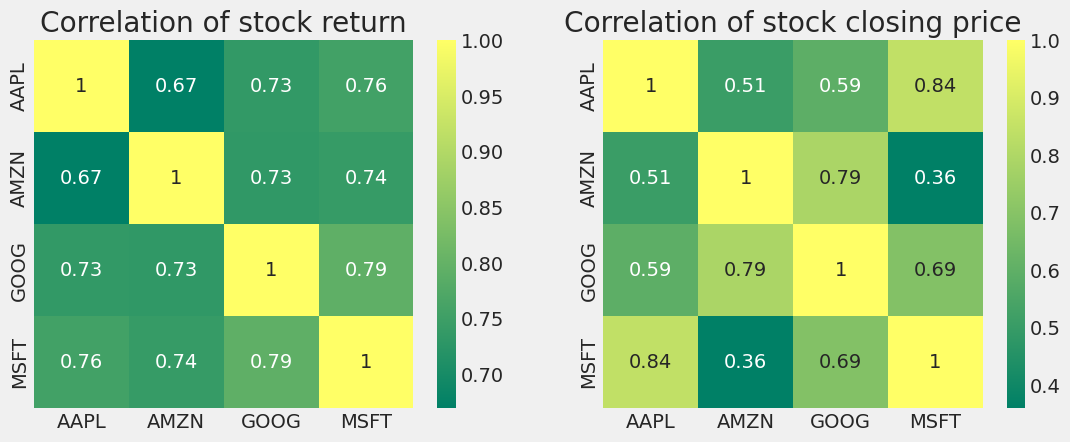

In [ ]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

🍬Import the necessary libraries, including matplotlib.pyplot and seaborn.

🍬Create a figure with a size of 12x10 using plt.figure(figsize=(12, 10)).

🍬Define the first subplot (subplot 1) using plt.subplot(2, 2, 1). 

🍬This subplot will display the correlation of stock returns.

🍬Use sns.heatmap() to create a correlation heatmap of tech_rets.corr().

🍬Set annot=True to display the correlation values on the heatmap. Use the color map 'summer' to represent the correlation values.

🍬Set the title of the first subplot using plt.title('Correlation of Stock Returns').

🍬Define the second subplot (subplot 2) using plt.subplot(2, 2, 2). This subplot will display the correlation of stock closing price.

🍬Use sns.heatmap() to create a correlation heatmap of closing_df.corr().

🍬Set annot=True to display the correlation values on the heatmap. Use the color map 'summer' to represent the correlation values.

🍬Set the title of the second subplot using plt.title('Correlation of Stock Closing Price').

🍬Display the plot using plt.show().

🍬

Calcular el riesgo

 in order to calculate any risk using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

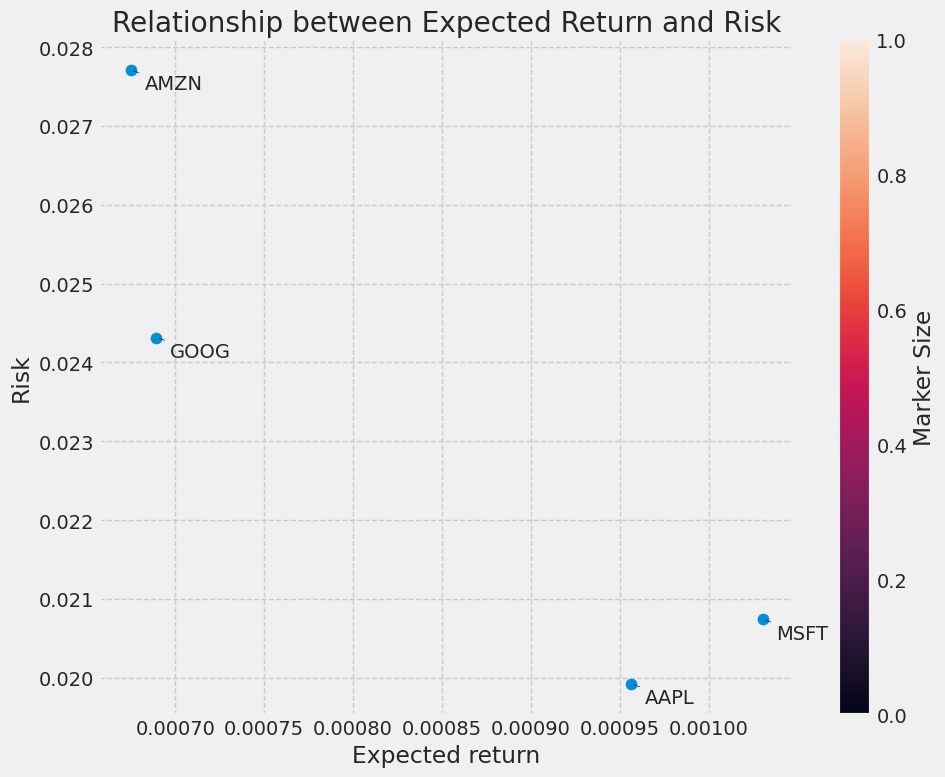

In [ ]:
import matplotlib.pyplot as plt

# Drop any rows with missing values in the tech_rets DataFrame
rets = tech_rets.dropna()

# Define the area size for scatter plot markers
area = np.pi * 20

# Create a figure with a size of 10x8
fig, ax = plt.subplots(figsize=(10, 8))

# Scatter plot of mean vs. standard deviation of returns
scatter = ax.scatter(rets.mean(), rets.std(), s=area)

# Set the x-label of the plot
ax.set_xlabel('Expected return')

# Set the y-label of the plot
ax.set_ylabel('Risk')

# Annotate the scatter plot with labels for each data point
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    ax.annotate(label, xy=(x, y), xytext=(10, -10), textcoords='offset points', ha='left', va='center',
                arrowprops=dict(arrowstyle='-', color='blue'))

# Add a grid to the plot
ax.grid(True, linestyle='--')

# Add a title to the plot
ax.set_title('Relationship between Expected Return and Risk')

# Add a colorbar legend for the scatter plot
cbar = fig.colorbar(scatter)
cbar.set_label('Marker Size')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


  ⏰  Higher expected returns often come with higher levels of risk. It is crucial to assess and manage risk according to individual risk tolerance, investment objectives, and time horizon.

  ㊙   Analyzing the relationship between expected return and risk helps investors evaluate the potential rewards in relation to the level of uncertainty and make informed decisions regarding asset allocation, diversification, and risk management strategies.

🏴  Expected Return:
🏴Expected return refers to the average or anticipated return that an investment or portfolio is expected to generate over a specific period of time. 🏴It represents the mean or average of the possible returns based on the probabilities of different outcomes. Expected return is typically calculated using historical data, financial models, or market expectations.

 🔴 Risk 🛺
 
Risk, in the context of investments, refers to the uncertainty or variability associated with the potential returns of an investment. It represents the possibility that actual returns may differ from the expected or anticipated returns. Risk is inherent in any investment and arises from various sources, including market volatility, economic factors, business risks, and other uncertainties.

PREDICTING CLOSING PRICE 💰 🤑


In [ ]:
# Get the stock quote
df = pdr.get_data_yahoo('AAPL', start='2012-01-01', end=datetime.now())
# Show teh data
df



[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.482929,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.550011,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.689342,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.821990,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.801659,394024400
...,...,...,...,...,...,...
2023-05-17,171.710007,172.929993,170.419998,172.690002,172.690002,57951600
2023-05-18,173.000000,175.240005,172.580002,175.050003,175.050003,65496700
2023-05-19,176.389999,176.389999,174.940002,175.160004,175.160004,55772400


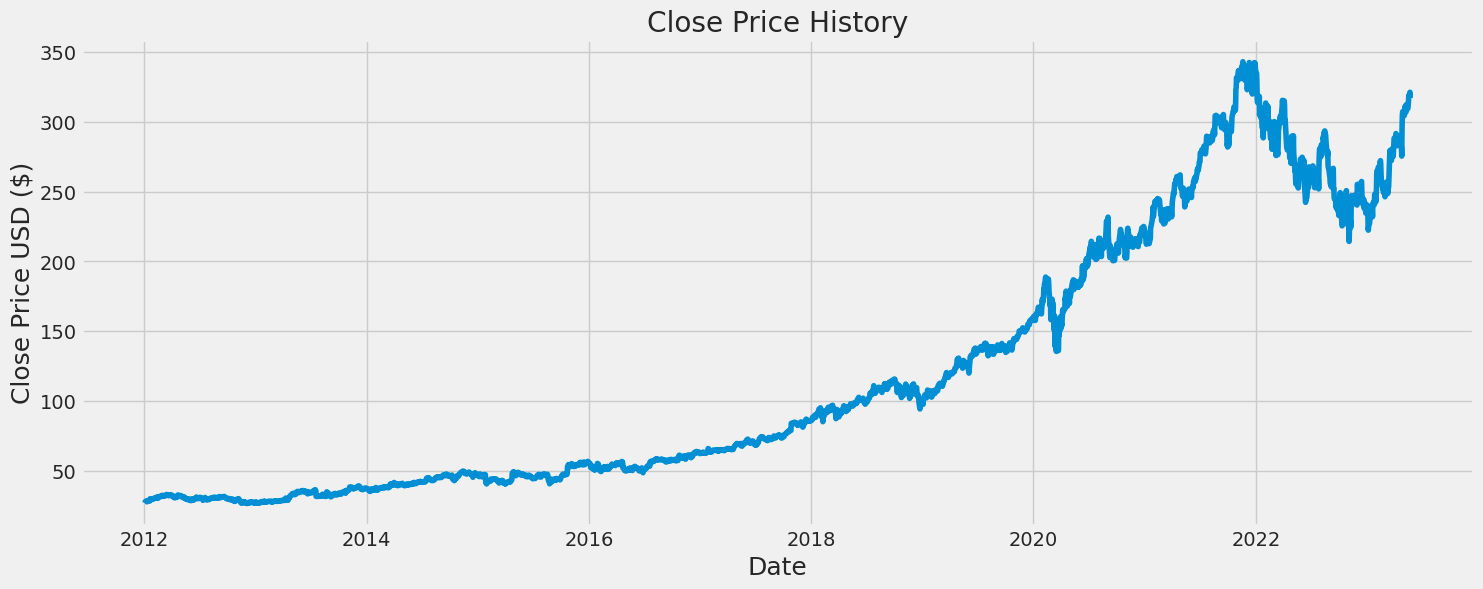

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2723

In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

# Create an instance of the MinMaxScaler class with the specified feature range of (0, 1)
scaler = MinMaxScaler(feature_range=(0, 1))

# Use the scaler to transform the 'dataset' using the fit_transform() method
scaled_data = scaler.fit_transform(dataset)

# Print the scaled data
scaled_data


array([[0.00126286],
       [0.00325187],
       [0.00413588],
       ...,
       [0.92179709],
       [0.93076342],
       [0.91781903]])

💙  Using the MinMaxScaler class from the sklearn.preprocessing module to scale the data in the dataset variable.

💙 Scaling is a common preprocessing step in machine learning that transforms the data to a specific range, typically between 0 and 1.

💙 The code initializes an instance of the MinMaxScaler class called scaler, specifying the desired feature range as (0, 1) using the feature_range parameter. This means that the scaled data will be within the range of 0 to 1.

💙The fit_transform() method of the scaler object is then used to perform the scaling operation on the dataset. 

💙This method calculates the minimum and maximum values of the dataset and scales each feature accordingly.

💙The resulting scaled data is stored in the scaled_data variable.

💙Finally, the code prints the scaled data, which represents the original dataset transformed to the specified feature range.

In [ ]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

# Iterate over the train_data starting from index 60
for i in range(60, len(train_data)):
    # Append the previous 60 data points to x_train
    x_train.append(train_data[i-60:i, 0])
    # Append the next data point to y_train
    y_train.append(train_data[i, 0])
    
    # Print the x_train and y_train for the first two iterations
    if i <= 61:
        print(x_train)
        print(y_train)
        print()


[array([0.00126286, 0.00325187, 0.00413588, 0.00549346, 0.00432531,
       0.00464103, 0.00426217, 0.00514617, 0.00593547, 0.00596704,
       0.00587232, 0.00552504, 0.01054492, 0.01060807, 0.00937677,
       0.01007135, 0.00988192, 0.00902948, 0.01022921, 0.00997664,
       0.01111321, 0.01130265, 0.01221822, 0.01209194, 0.01256551,
       0.01354423, 0.01389152, 0.01303908, 0.01329166, 0.01224979,
       0.01161836, 0.01553325, 0.01540696, 0.01600682, 0.0154701 ,
       0.01578582, 0.0161331 , 0.01572267, 0.0173644 , 0.01695397,
       0.01869041, 0.01802741, 0.01714339, 0.01638568, 0.01726968,
       0.0178064 , 0.01774326, 0.01790112, 0.01989012, 0.02020585,
       0.02045841, 0.01966912, 0.01840626, 0.01774326, 0.01749068,
       0.01777483, 0.0178064 , 0.01963756, 0.01941656, 0.01837469])]
[0.018153685590104426]

[array([0.00126286, 0.00325187, 0.00413588, 0.00549346, 0.00432531,
       0.00464103, 0.00426217, 0.00514617, 0.00593547, 0.00596704,
       0.00587232, 0.00552504, 0.0

✅The code first creates a scaled training dataset (train_data) from the scaled_data variable. The train_data consists of a subset of rows from scaled_data starting from index 0 up to training_data_len. The exact value of training_data_len is not shown in the code snippet.

✅the code initializes empty lists, x_train and y_train, which will hold the input features and the corresponding target values, respectively.

✅A loop is then executed starting from index 60 and going up to the length of train_data.

✅n each iteration, the previous 60 data points (from index i-60 to i) are appended to x_train. This creates a sliding window of 60 data points that will serve as input features for the model.

✅The next data point (at index i) is appended to y_train. This represents the target value that the model will learn to predict based on the input features.

✅(if i <= 61) to print x_train and y_train for the first two iterations. This is likely added for debugging or verification purposes.

In [ ]:
# Convert the x_train and y_train lists to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Print the shape of x_train
print(x_train.shape)


(2663, 60, 1)


🌵The code converts the x_train and y_train lists into numpy arrays using the np.array() function from the NumPy library. This conversion is often necessary when working with machine learning models that expect input data in the form of numpy arrays.

🌵After converting to numpy arrays, the code reshapes the x_train data to add an additional dimension. This is achieved using the np.reshape() function. The reshaping is done to match the expected input shape of the model.


🌵The reshaping operation transforms x_train from a 2-dimensional array of shape (samples, features) to a 3-dimensional array of shape (samples, time steps, features). The added dimension represents the "time steps" or the sequence length of the input data.

🌵 Finally, the code prints the shape of x_train using the print() function and the .shape attribute. This provides information about the dimensions of x_train after the reshaping operation.



In [ ]:
# Import the required libraries
from keras.models import Sequential
from keras.layers import Dense, LSTM #long short term memory

# Build the LSTM model
model = Sequential()

# Add the first LSTM layer with 128 units, return_sequences=True to return sequences for the next layer,
# and specify the input shape as (x_train.shape[1], 1)
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))

# Add the second LSTM layer with 64 units and return_sequences=False to return only the final output
model.add(LSTM(64, return_sequences=False))

# Add a Dense layer with 25 units
model.add(Dense(25))

# Add a Dense layer with 1 unit for the final output
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model using the x_train and y_train data, with a batch size of 1 and 5 epochs
model.fit(x_train, y_train, batch_size=1, epochs=5)


Epoch 1/5
2663/2663 [==============================] - 126s 46ms/step - loss: 0.0013
Epoch 2/5
2663/2663 [==============================] - 117s 44ms/step - loss: 5.0063e-04
Epoch 3/5
2663/2663 [==============================] - 119s 45ms/step - loss: 3.4416e-04
Epoch 4/5
2663/2663 [==============================] - 130s 49ms/step - loss: 3.6061e-04
Epoch 5/5
2663/2663 [==============================] - 144s 54ms/step - loss: 2.9150e-04


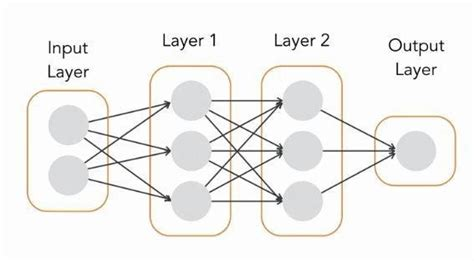

☯The model is initialized as a sequential model using Sequential(). A sequential model is a linear stack of layers.

☯The first layer added to the model is an LSTM layer with 128 units. return_sequences=True indicates that this layer will output sequences instead of a single output. The input_shape is set to (x_train.shape[1], 1), which corresponds to the shape of the input data.

☯The second layer is another LSTM layer with 64 units. Since return_sequences=False, this layer will only output the final sequence output.

☯A Dense layer with 25 units is added after the LSTM layers.

☯a Dense layer with a single unit is added as the output layer.

☯The model is compiled using the Adam optimizer and the mean squared error loss function (loss='mean_squared_error').

☯ The model is then trained using the fit() function. The x_train and y_train data are provided as inputs. The training is performed with a batch size of 1 and for 5 epochs.

The code sets up and trains an LSTM model using the Keras library for sequential data analysis or prediction tasks.

In [ ]:
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
# Inverse transform the scaled predictions to the original data scale
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 0s 68ms/step


6.573795172175503

👺 The test data starts from training_data_len - 60 and includes all the rows until the end of the scaled_data array. This ensures that the test data has the same sequence length (60) as the training data.

👺It initializes two empty lists, x_test and y_test, which will be used to store the input and target data for testing.

👺A loop iterates over the test data starting from index 60 and goes until the length of test_data. Inside the loop, it appends a sequence of length 60, obtained from test_data[i-60:i, 0], to the x_test list. This sequence represents the input data for testing.

👺The y_test is assigned the corresponding target data from dataset, starting from the index training_data_len. This ensures that y_test contains the actual values for the test data.

👺The x_test list is converted to a numpy array for further processing.

👺The shape of x_test is reshaped to match the expected input shape of the model. It reshapes x_test to have dimensions (x_test.shape[0], x_test.shape[1], 1), where x_test.shape[0] represents the number of samples, x_test.shape[1] represents the sequence length (60), and 1 indicates that there is only one feature in the input.

👺The model predicts the price values based on the reshaped x_test data.

👺The predictions are inverse transformed from the scaled values back to the original data scale using the scaler. This step is necessary because the model was trained using scaled data, and we want to compare the predictions with the original unscaled data.


👺The root mean squared error (RMSE) is calculated by taking the square root of the mean of the squared differences between the predictions and y_test. The RMSE gives an indication of the model's performance by measuring the average deviation between the predicted values and the actual values.

The Root Mean Squared Error (RMSE) is a commonly used metric for evaluating the accuracy of a predictive model, particularly in regression tasks. It measures the average magnitude of the differences between predicted values and actual values.

Here's how the RMSE is calculated:

Take the predicted values from the model and the corresponding actual values.
Calculate the squared difference between each predicted value and its corresponding actual value.
Take the mean of all the squared differences.
Take the square root of the mean squared differences to obtain the RMSE.
Mathematically, the formula for calculating RMSE is as follows:

RMSE = sqrt(mean((predictions - actual_values)^2))


<ipython-input-36-99dda2bd0050>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


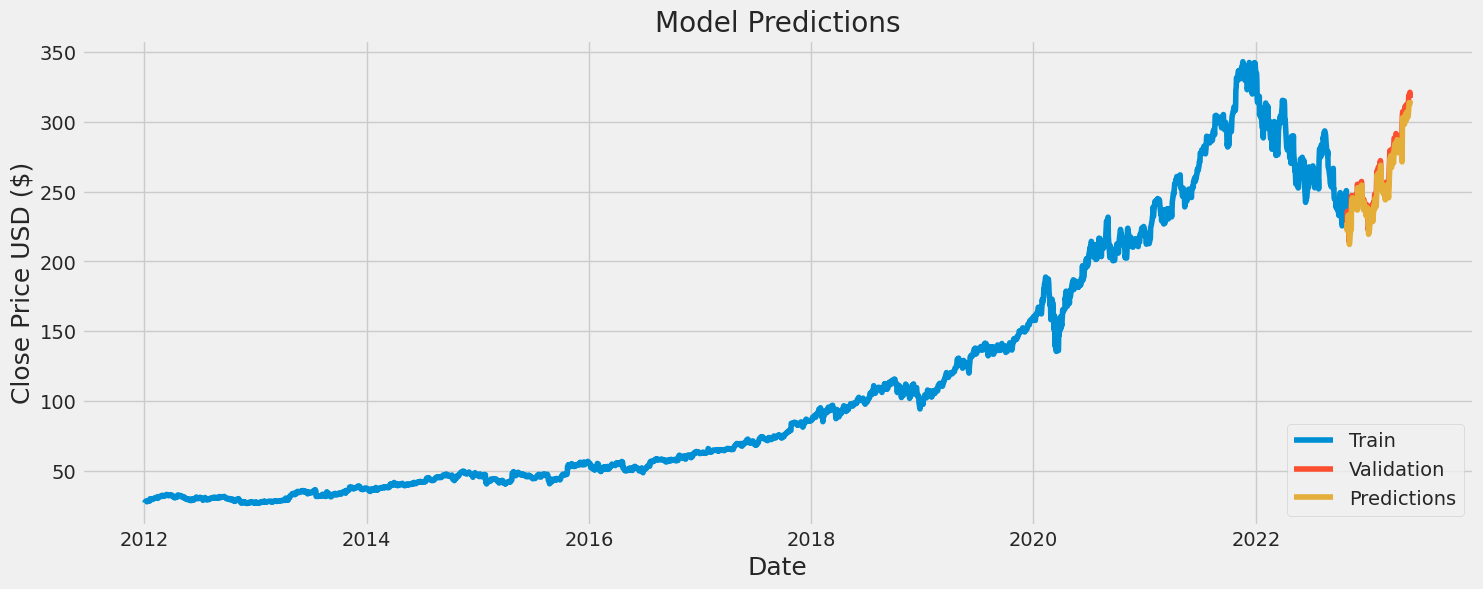

In [ ]:
# Separate the training and validation data
train = data[:training_data_len]
valid = data[training_data_len:]

# Add the model's predictions as a new column in the validation data
valid['Predictions'] = predictions

# Visualize the data using a line plot
plt.figure(figsize=(16, 6))
plt.title('Model Predictions')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

# Plot the training data
plt.plot(train['Close'], label='Train')

# Plot the validation data (actual and predicted)
plt.plot(valid['Close'], label='Validation')
plt.plot(valid['Predictions'], label='Predictions')

# Add a legend to the plot
plt.legend(loc='lower right')

# Display 

#APPL

 ▶  The training data is plotted using the 'Close' column from the train DataFrame.

▶The validation data (actual values) is plotted using the 'Close' column from the valid DataFrame.

In [ ]:
valid

,Close,Predictions
Date,,
2022-10-27,226.750000,227.774429
2022-10-28,235.869995,222.074722
2022-10-31,232.130005,233.100525
2022-11-01,228.169998,231.144760
2022-11-02,220.100006,226.248093
...,...,...
2023-05-17,314.000000,306.703979
2023-05-18,318.519989,309.070007
2023-05-19,318.339996,313.523376
